<img align="center" width="12%" style="padding-right:10px;" src="Images/Ccom.png">

# Tools for Ocean Mapping <a href="https://teams.microsoft.com/l/channel/19%3anLW3JzlSiEQLpIBtk3QaOqLYRlRECyjhkUkC3WH1qKM1%40thread.tacv2/General?groupId=e05e4f0f-c653-4060-854e-6a776126d431&tenantId=d6241893-512d-46dc-8d2b-be47e25f5666"><img src="Images/help.png"  title="Ask questions on Teams" align="right" width="10%" alt="Teams.com"></a><br><br> Lab 7: Handling Motion Data 



***

## Creation of a Motion Class

For this lab you will create a motion class - you will use this positioning class to hold data contained in a data file with just motion data. 

The first step consists of creating some code that opens a motion file.

The next step is then to use a positioning class object to parse the data and store the data. 

The final step is to then create a write method to write the data to file

***

## Initialization

In [30]:
%load_ext autoreload
%autoreload 2

import sys
import os
import numpy as np
from mycode.motion import Motion
from mycode.position import Position


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


***

## Overview


### The Data

<img align="left" width="100%" style="padding-right:10px; padding-top:10px;" src="Images/usns-henson.png"><br>

The data provided here were collected by the USNS Henson, a 100m long hydrographic survey vessel. It operates an EM710 multibeam which is mounted in a gondola about 7m below the water line. It uses a POS/MV 320 for orientation. The available Ellipsoid referencing is from a NavCom (C-Nav) receiver generating 1Hz RTG heights from the masthead.

The vessel was operating in approximately 100 m of water in open ocean conditions in the Western Pacific. The data is from a half hour period when the vessel was steaming at about 12 knots and undertook a 180 degree turn.

Ellipsoid heights have already been converted to Geoid heights using EMG08.

The data stream that you will read consists of:

    Motion (roll, pitch, heading, heave) at 100 Hz




***

<img align="left" width="6%" style="padding-right:10px;" src="./Images/info.png"> 
## Lab Implementation in Python

This lab assumes a basic familiarity with Python at the level reached upon completion of the ePOM [**Programming Basics with Python for Ocean Mapping**](../python_basics) and [**Foundations of Ocean Data Science**](../ocean_data_science) sets of notebooks.

If you are already well versed in programming with Python you are free to move through the steps ahead of when they are assigned.

As part of the labs in this course you will be developing Python classes that may be used in other courses as well.

The goal is not too develop the most elegant and/or efficient code possible, but to have you write code that helps you achieve the learning objectives of the labs.

___

<img align="left" width="6%" style="padding-right:10px;" src="./Images/key.png"> 
Note that you are free to design your own code in Python or another language. If you decide to do so you have to demonstrate ***equivalency*** of the deliverables. Also, we will be happy to support any coding questions for those following the (Python) instructions provided here, but can not provide the same level of service for those using different algorithms and/or programming languages.

***


# Step 7.0: Creating a Motion Class

In this step you will a class that can hold Motion data and associated metadata. 

After completion of this step an `object` of this class type will not do much yet. At this point you will only create the class definitions and their data attributes. 

<img align="left" width="6%" style="padding-right:10px;" src="./Images/key.png">

In this step you will create a class `Motion`.

<img align="left" width="6%" style="padding-right:10px;" src="./Images/test.png">

Modify the mostly empty `motion.py` file located in the `mycode` folder to successfully execute the code in the code cell below.

To define the class you may use:
    
    class Motion:
        """A Class for handling Motion Data"""

        def __init__(self):
            pass


Passing a Motion object to the `print()` function should result in the string: `The object type is <class 'mycode.motion.Motion'>` You may achieve this by adding the \_\_str\_\_ method

    def __str__(self): 

In [31]:
motions = Motion()
print(motions)

angle__units: rad
distance_units: m
time_basis: UTC



    <mycode.motion.Motion object at ................>


***

## 7.0.0 Class Initialization and Attributes

We can now add a few attributes to the previously defined `Motion` class:

* Five lists (named `times`, `yaw`, `roll`, `pitch` and `heave` respectively
* A string called `data_path`
* a numpy array called proj_pos
* A `metadata` dictionary with the following pairs of key and value:
  * `"angle__units"`: `"rad"` for the unit of measured angles
  * `"distance__units"`: `"m"` for the unit of measured angles
  * `"time_basis"`: `"UTC"` for the unit of measured angles

<br><br><br>
<img align="left" width="6%" style="padding-right:10px;" src="./Images/info.png"> 
    
    An empty list may be declared by a statement such as:

        my_list = []

    Similarly an empty string is declared by:

        my_string = str()

    As you may see the `numpy` package is imported as `np`. Thus to create an empty `numpy` array we may use:

        my_np_array = np.array([])

    Finally an empty dictionary is declared by:

        my_dict = dict()

    As described in [*Class Initialization and Attributes*](../../python_basics/008_A_Class_as_a_Data_Container.ipynb#Class-Initialization-and-Attributes), the 0initialization of the class attributes happens in the *magic* `__init__(self)` method.

***

## 7.0.1 The String Representation Method

Create a `__str__` method for the Position class in similar fashion as the one you created for the `Position` class. We also want to print the start and end time. However, just like for the `Position class`, at this point there are no data yet. To get around this you must make the printing of the time data conditional upon data being present. 

print the `motion` object 

In [32]:
motions = Motion()
print(motions)

angle__units: rad
distance_units: m
time_basis: UTC



    angle__units: rad
    distance_units: m
    time_basis: UTC

___
## 7.1 Reference Coordinate Systems and Frames

<ins>I</ins>nertial <ins>N</ins>avigation <ins>S</ins>ystems (**INS**) are used to orient and position local reference frames with respect to inertial reference frames. Therefore, we need to expand on what these terms mean before discussing what INSs observe and how they do so.

The distinction between a reference system and a reference frame is that a system is the conceptual definition of how a coordinate is formed through a set of rules. A reference frame is then the practical realization of a reference system through a set of observations. It is therefore possible to have different reference frames that use the same reference system e.g., if you and I both did a survey of a vessel at the same time and followed the same rules defined by the reference system we would still end up with slightly different reference frames. This is primarily due to the errors in each of our sets of observations. *To produce unambiguous results, it is therefore a key requirement to adopt one of the reference frames as the standard*. 

In the field of Geodesy significant effort is undertaken to establish reference systems and create reference frames associated to them, but even then there are often differing reference frames based on the same reference systems (e.g. NAD83 vs. WGS84 vs IGS08 vs ITRF for the surveyors among you).

Another cause for reference frames based on the same reference systems to differ is that the body to which the reference frame is attached itself changes over time. Thermal expansion of an aluminum hull on which a reference frame is implemented through monumentation is an example of this. 

The extent to which we have to take various effects into account depends on the intended use of a reference frame. It would be too onerous to create a reference system with numerous rules if the uncertainty requirements on the reference frames do not warrant them. For example the thermal expansion of aluminum is not a significant enough effect to have to have to encounter for it in the implementation of a reference frame aboard an aluminum hulled research vessel intended for ocean mapping.


### 7.1.0 Reference Coordinate Systems

<img align="left" width="100%" style="padding-right:10px;" src="./Images/2_ref_systems.png"> 

*Two reference coordinate systems. The first is represented by the gray coordinate axes, the second by the red, green and blue vectors. In motion sensing we determine transform parameters needed to plot map coordinates relative to one system in another.*

Reference coordinate systems are sets of rules that allow us to describe positions and attitudes through a set of numbers. Reference systems require a definition of the origin and can be unit-less (think of plotting graphs of math problems without units). However, in the case of Ocean Mapping we typically use SI units (coordinates in meters, angles in radians) or geodetic units (angles in degrees of: latitude, longitude, heading, pitch and roll). Coordinate systems come in many forms such as:

1. Cartesian coordinate systems that you are all familiar with from math classes 
2. Homogeneous systems (where you evaluate the ratios of coordinates, rather than the coordinates themselves) 
3. Cylindrical coordinate systems (often used in physics) 
4. Polar coordinate systems (often used in electrical engineering)
5. Spherical and Geodetic coordinate systems (Often used for positioning)
    5. Geodetic coordinate systems are coordinate systems on an ellipsoid of revolution closely matching the shape of the Earth or other celestial body


---
### 7.1.1 Conventional Reference Systems

Conventional Reference Systems require the following to be defined

- Conceptual definition of coordinate system
- Origin
- Direction of fundamental planes or axes
- Mathematical models (metric)
- Physical models
- Time handled separately
    - For motion sensing of key importance!
    
Conventional reference systems are the ones that we most frequently encounter in Ocean Mapping applications in the form of Cartesian and Geodetic coordinate systems.

#### 7.1.1.0 Origin

For conventional systems to be useful careful though must be given to the definition of the rules. For example, if the origin is defined to be the center of gravity of a surface vessel then all the coordinates of the vessel are constantly in flux due to fuel consumption, the location of people on board, re-balasting tanks, etc. Also the origin would likely be on a location that cannot be monumented i.e., no physical measurement can be made to this location. It is therefore more useful to create a rule that states that the origin should be in an accessible location located as near as possible to the average location of the center of mass. 

---
#### 7.1.1.1 Handedness of Coordinate Systems 

<img align="left" width="60%" style="padding-right:10px;" src="./Images/r_handed_coords.png"> 
Right-Handed coordinate system, the straight arrows indicate the positive directions along the successive coordinate axes, the curved arrows indicate positive spin direction.

The rule for the direction of the fundamental planes and handedness has similar implications and due care should be taken in their definition. It would, for example, make little sense to not have one of the axes align to the length axis of a vessel, as the term heading would lose its traditional meaning.

Note that there may be other rules that are associated to coordinate systems, for example a model of gravity for inertial coordinate systems. So what are some of these?

Cartesian (and other) coordinate systems are typically right-handed or left-handed. A coordinate system is right handed when you use your right hand to point your thumb in the direction of the positive 1 axis (often called x-axis), your index finger in the direction of the positive 2 axis (y) you can bend your middle finger inwards to point in the direction of the positive 3 axis (z). A coordinate system is left-handed if you can do the same thing, but need your left hand to have your middle finger point in the positive z-direction.

To determine the positive direction of rotation in a right-handed coordinate system point your thumb in the positive direction of a coordinate axes, if you then curl the fingers of your hand inwards they are moving in the positive rotation direction. To determine positive rotations in a left-handed system, follow the same procedure, but using your left hand.

In order to be able to determine the transformation between two reference systems without the need to observe points in both simultaneously we need to be able to observe forces, for this it is required that one of the coordinate systems is an inertial one.

---
#### 7.1.1.2 Mathematical Models

A full discussion of mathematical models used in Ocean Mapping goes far beyond the scope of the discussion here as geodetic coordinates are curvilinear and referenced to an ellipsoid, making that any implementation of a metric will involve the solution of elliptic integrals. 

However, for shipboard application, we can make our lives significantly easier by defining the ship’s reference system as a Cartesian system with an appropriate scale (e.g. distance unit: meter) so that we may use Euclidean distance as the metric, which in this case is given by the Pythagorean formula. When doing this all motions may be described using the mathematical models that you are used to from classical mechanics. Any error in the reference frame may then be observed as correlations between motions e.g., the rolling of a vessel may be seen in pitch observations.

---
#### 7.1.1.3 Physical Models: Inertial Coordinate Systems

<img align="center" width="80%" style="padding-right:10px;" src="./Images/inertial_coords.png"><br>
*Inertial Coordinate System*

Inertial coordinate systems are systems in which Newton’s laws of motion are preserved in any direction. That means that if any object starts moving in any given direction and is not subject to accelerations it will have the same speed and direction in any part along its trajectory in an inertial space i.e., the inertia throughout the space is isotropic (the same in all directions) and homogeneous. If therefore on Earth we create a coordinate system that is aligned to gravity with two orthogonal directions to it with consistent distance units in each direction we have defined an inertial system.

In practice we use a local right-handed Cartesian inertial system with its origin on an equipotential surface (a given mass will have the same potential energy anywhere along the surface) at the location of the sensor. The z-axis is then defined as the surface normal in the anti-direction of gravity and distances in the direction of this axis are usually referred to as height differences. The y-axis of the inertial coordinate system is orthogonal to the local gravity vector and lies in the plane spanned by the local gravity vector and the instantaneous spin axis of the Earth, distances in this direction are often referred to as Northings. Finally, the x-axis is orthogonal to both z-axis and y-axis and intersects them at the Geoid surface; distances in this direction are often referred to as Eastings. Note that the geoid surface forms a two dimensional inertial space. Any object positioned at rest along its surface will experience an acceleration in the direction of gravity i.e., orthogonal to the surface!

We can sense the orientation of a non-inertial reference system with respect to an inertial system by observing the direction of the proper accelerations associated to gravity and the Coriolis effect along its axes. How this is done is discussed in the sections describing measuring the gravity vector with accelerometers and the north vector with gyroscopes respectively. It is however important to note here that these directions are measured with respect to the instantaneous gravity field and Earth spin axis. Measuring proper accelerations and rotations along the axes of coordinate systems with respect to inertial systems is the foundation of inertial navigation and motion sensing.

The above paragraph implies that do a proper transformation it is of key importance that the most up to date gravity field model is used for the transformation. Maintaining proper gravity models is therefore a key task of national geodetic survey agencies!  

---
### 7.1.2 Reference Frames

Reference frames consist of a set of points assigned with coordinates that follow the rules established by the associated reference coordinate system.  It is important that these points are stable, as any change in their distance and direction with respect to each other would lead to a ambiguous set of coordinates and would violate the rules of the coordinate system. An important aspect of reference frames is that there need to be enough reference points so that one can easily position oneself. Due to this often there are significantly more points than minimally necessary. All these points will contain error and may drift with respect to each other. For example, tectonic drift will affect the relation between reference points in a global reference frame, and the flexing of a hull may create variances in a ship’s reference frame. Therefore, reference frames are associated with an epoch (point in time) and care should be taken to observe the positions of the reference points themselves with respect to their locations at the epoch the frame was established. If there is motion in the reference frame beyond the measurement uncertainty this is an indication that the frame is not representative of a rigid body.



---
### 7.1.3 Ships’ and MRU’s Reference Frames

Typically, a ship’s reference frame is Cartesian and its origin is on of the points which is somewhat confusingly is referred to as the reference point. Note that often we try to have the ship’s reference point be relatively close to the Center of Gravity (CoG) in an easily accessible place as we want to be able to report the angular rates as spin rather than evolution rates. There is however no need to have this point at this location if we know what the lever arms (distance along the coordinate axes) between them is. Note that this is problematic, as the location of the CoG will vary as a function of loading of the vessel and is therefore time dependent, which on smaller vessels may lead to significant error. 

To establish a ship’s reference frame, a minimum of 3 points is needed. Typically, we try to align the frame with the ship’s keel (X-axis), the general ‘down’ direction (Z-axis) and the direction orthogonal to these two, which is defined by two points in a horizontal plane orthogonal to the y-axis. Although theoretically 3 points will suffice in practice typically 5 or more are used (two points along the line from the bow to the stern, two points across the vessel close to halfway and a central reference point). Note that all these points need to be on strong points that are not likely to move during the life of the vessel, for example a point on a railing would be less than ideal as it is likely that the railing will be bent at some point in the lift of the vessel.

Marked points in the IMU housing typically define the reference frame of the MRU and are known as monuments. The triads of gyroscopes and accelerometers are then carefully aligned along the axes defined by the reference frame and the manufacturer will calibrate the system so that the data are output relative to the directions defined by the reference points.

---
## 7.2 Transformations between Reference Frames 

For data collected to be useful for others we need to reference them to an inertial coordinate system. The process of transforming the data to an Earth bound inertial reference frame is known as ‘geo-referencing’.  Assuming that the survey platform and all the components mounted to it can be regarded as a rigid body we may use a rigid body transform i.e., a linear transform that is completely described by a set of rotations and translations. Therefore, all we need to make the transform is the establishment what the rotations and translations needed for the transform are. 

This is where INSs come into play. If you can measure the orientation and magnitude of the gravity acceleration you can determine your attitude with respect to gravity by measuring the accelerations in three orthogonal directions as long as your device is not experiencing non-gravitational accelerations e.g., motions due to waves or vibrations of your survey platform’s propulsion system. It is possible to observe rotational rates independent of external acceleration through the use of gyroscopes; therefore, INSs always carry a set of accelerometers as well as gyroscopes. Theoretically accelerometers also can measure the distance traveled through an inertial space by twice integrating the observations, thus with the knowledge of the attitude of the INS and its positions it is possible to plot the trajectory the INS has taken through space, a process akin to dead reckoning (use your favorite search engine on the web if you do not know what that is). However, the solutions are prone to significant drift for reasons we will discuss in the section regarding accelerometers. In practice we use either an external or an internal positioning system to keep the position solution from drifting. The process of combining the gyroscope data, accelerometer data and positioning data is generally referred to as sensor fusion and will be discussed at in the Geodesy course.


---
### 7.2.0 Reporting Attitude

As discussed with coordinate systems in positioning there are only a handful of representations used (Cartesian, geodetic, etc.). There are, however a myriad number of methods to represent attitude, many of which have particular advantages in certain applications. Rather than discussing all these methods I will list some of them here:

- Euler Angles: Rotation in three consecutive rotations around a rigid body frame – these are the primary representation used in Ocean Mapping
- Axis Azimuth: Characterization of the spin axis elevation and right ascension angles, used mainly for spinning rigid bodies, such as spacecraft
- Euler-Rodriques symmetric parameters or Quaternions: Euler angles fail in certain relations between the reference frames. In Ocean Mapping this is often the case when the bow of a vessel points straight up or down. When this is likely to happen Quaternions are often used instead. Note that with Euler angles a given attitude may be represented by various different sets of angles, whereas this representation is unambiguous. Using quaternions is also beneficial in terms of computational efficiency. The disadvantage is that many have a much harder time conceptualizing quaternions
- There are numerous other, less commonly used, attitude representations


---
#### 7.2.0.0 Euler Angles

In Ocean Mapping we typically report attitude using Euler angles. Euler angles represent consecutive rotations around the orthogonal axes of a rigid body frame and therefore are conceptually simple. However, using them is computationally intensive and their representation of attitude includes a singularity (which we can fortunately avoid almost entirely by careful choice of the order of the consecutive rotations). 

For any vector space of dimension $N$ there are $2N!$ possible orders of rotation around the axes e.g., first around the $1-axis$, then around the now rotated $2-axes$ and then again around the new direction in which the $1-axes$ points; this would be annotated as a $1-2-1$. 
 
There are two options for Euler angles, either they represent rotations of a point around the frame of a rigid body (extrinsic rotations) or physical rotations of the rigid body itself (intrinsic rotations or body referenced Euler angles). In the case of Ocean Mapping we are interested in the attitude of an INS strapped to the survey vehicle i.e., we want to know the consecutive physical rotations of the INS reference frame, thus we want to report the intrinsic angles. The body-fixed axes are known as **Euler-axes** and in a 3D space there are 12 possible sets of Euler angles, six symmetric sets:

    1-2-1		1-3-1 		or equivalently	x-y’-x’’		x-z’-x’’
    2-3-2		2-1-2					        y-x’-y’’		y-z’-y’’
    3-1-3		3-2-3					        z-x’-z’’		z-y’-z’’
    
    
And six asymmetric sets, which are commonly known as **Tait Bryan** or **Cardan** angles:

    1-2-3		1-3-2		or equivalently	 x-y’-z’’		x-z’-y’’
    2-1-3		2-3-1					        y-x’-z’’		y-z’-x’’
    3-1-2		3-2-1					        z-x’-y’’		z-y’-x’’

The matrices describing a rigid body rotation transformation around an axis in right-handed Cartesian coordinate systems are respectively:<br>

              
$$R_x=\begin{bmatrix}1&0&0\\0&\cos(\theta)&-\sin(\theta)\\0&\sin(\theta)&\cos(\theta)\end{bmatrix}$$

<br>

$$R_y=\begin{bmatrix}cos(\varphi)&0&sin(\varphi)\\0&1&0\\-sin(\varphi)&0&cos(\varphi)\end{bmatrix}$$

<br>

$$R_z=\begin{bmatrix}cos(\beta)&-sin(\beta)&0\\sin(\beta)&cos(\beta)&0\\0&0&1\end{bmatrix}$$

Where:

$\theta$: rotation around the 1- or x-axis<br>
$\varphi$: rotation around the 1- or x-axis<br>
$\beta$: rotation around the 1- or x-axis<br>



---
#### 7.2.0.1 Order of rotation: pitch, roll and yaw 

Note that it is crucial when using Euler angles to know which order is chosen and whether the angles are extrinsic or intrinsic. The aforementioned singularity will occur in a direction depending on the order chosen. In Ocean Mapping we tend to use a right handed local coordinate system with the $x$-axis in the forward direction of the keel, the $z$-axss in the average ‘down’ direction and the $y$-axis in the starboard direction and use the intrinsic $z-y’-x’’$ order of rotations, known as nautical angles, with the associated rotation matrix $R_{xyz}$. In this case the rotation $\beta$ is known as yaw, the rotation $\varphi$ as pitch, and the rotation $\theta$ as roll. The associated Rotation Matrix is:

$$R_{xyz}=R_x R_y R_z$$


___
## 7.3 inertial Navigation Systems

<ins>I</ins>nertial <ins>N</ins>avigation <ins>S</ins>ystems (**INS**) are used to orient and position, among other things, survey platforms. They allow us to transform observations relative to the <ins>S</ins>hip <ins>R</ins>eference <ins>F</ins>rame  to inertial reference frames such as georeferenced reference frames at the **epoch** of observation; Geodetic latitude, longitude are examples of georeferenced coordinates in an inertial reference frame. INSs provide complete solutions necessary for the integration of survey data. That is: with knowledge of where sensors are located on the survey platform we can combine the data from them using time tags as the basis for integration. We normally have the condition that the platform on which an INS is mounted should be a rigid body and thus the motions observed at the INS are representative of the entire platform. If this condition is not met i.e., the platform flexes, the placement of the INS relative to the sensors becomes crucial, and it may even be necessary to mount multiple INSs.

Modern INSs used in ocean mapping typically consists of:

- 3 Orthogonally mounted gyroscopes
- 3 orthogonally mounted accelerometers
- 2 GNSS receivers

Usually these are provided in the following components:

- 1 IMU: device holding the accelerometers and gyroscopes
- 1 Processing unit holding the electronics associated to the IMU components and GNSS receivers
- 2 GNSS antennas

___
### 7.3.0 Measuring Rotational Rate with Gyros

There are three classes of devices all commonly referred to as gyroscopes: 

1. True or Conventional Gyroscopes
2. Optic Gyroscopes
3. Micro Electro Mechanical System MEMS) Gyroscopes

Note that conventional gyrocompasses can be used to measure rotation directly, whereas optic and MEMS gyroscopes can only be used to observe rotation rates

___
### 7.3.0.0 Conventional Gyroscopes

<img align="center" width="80%" style="padding-right:10px;" src="./Images/conventional_gyro.png"><br>
*A Mechanical Gyroscope (photo courtesy: http://www.gyroscope.com/ Dec. 4 .2015)*

The first class is that of the traditional gyroscopes, that contains a spinning wheel. The axis of rotation can be oriented in any direction and is free to rotate in its mounting. Once the wheel is spinning the orientation of the wheel is preserved in an inertial reference frame due to the conservation of angular momentum, a direct result of Newton’s second law of motion.

$$L=rmv\hat{\text{u}}=r^2 mω$$

Where: 
$L$: angular momentum<br>
$r$: radius<br>
$m$: mass at radius $r$<br>
$\hat{\text{u}}$: Unit vector in the direction of the axis of rotation (follows handedness of the inertial reference frame)<br>
$\omega$: Angular velocity around origin<br>

In practice we use a gyroscope flywheel for measuring roll pitch and yaw. The wheel is mounted in a set of three orthogonal axes. The wheel is attached to the inner gimbal by the two end points of its spin axis; the inner gimbal is in turn attached to a orthogonal axis with a rotation axis orthogonal to the wheels axis and intersecting through the plane of the wheel. This outer gimbal is then attached to a frame. 

Mechanical gyroscopes require extreme precision in construction and are therefore expensive to manufacture, they are heavy and difficult to maintain and they are sensitive to shock. They are also prone to gimbal lock-in, which occurs when the flywheel spin axis and the $2^{nd}$ orthogonal axis are aligned. Finally, they require to be positioned in such manner that the flywheel is free to spin, making placement a challenge.  In Ocean Mapping we much prefer smaller devices without mechanical parts that we can strap down to our survey vessel, you will therefore likely not ever encounter conventional gyroscopes in the field.

___
### 7.3.0.1 Optic Gyroscopes

<img align="center" width="30%" style="padding-right:10px;" src="./Images/sagnac.png"><br>
*Sagnac Effect Conceptual principle. A laser is used to transmit coherent light. The light is split by a half mirror and traverses through the wave-guide in opposite directions, and is recombined using the same half mirror. The interference fringes are then observed at the detector. Image from: https://en.wikipedia.org/wiki/Sagnac_effect 12/6/2015

All use the Sagnac effect to measure rotation rate. The Sagnac effect occurs when monochromatic coherent light from a common source (laser) is split and made to traverses a common path through a wave-guide in two opposing directions to a detector. 

___
### 7.3.0.1.0 Open loop FOGs 

At the detector the signal from both directions is superimposed and the interference fringes are observed.  If the assembly is rotating in an inertial frame the signal that is traveling in the direction of rotation will traverse a slightly longer distance than the signal traveling in the opposite direction leading to a time of arrival difference. In comparison to a static wave guide a rotating circular wave-guide with an external source (open loop FOG) that moves with it the signal traveling in the direction of the rotation will need to travel an extra distance $\Delta s$ in time t to reach the detector, whereas the signal traveling in the opposing direction will have to travel distance $\Delta s$ less to reach the detector. This distance depends on the angular velocity $\omega$ of the wave-guide:


$$\Delta s=r\omega t$$

Where:

$\Delta s$: Path length difference due to rotation of the wave-guide 
$r$: radius of  wave guide
$\omega$: Angular velocity around origin
$t$: time

Thus we can find the angular velocity $\omega$ by :

$$\omega=\frac{\Delta s}{rt}$$

However, since this is a bootstrap device and we do not have an inert frame relative to which we can measure the distance $\Delta s$, we need an observable other than distance. The time $t$ it takes to traverse through the wave-guide can be measured. The time $t_\rightarrow$  it takes to travel in the rotation of direction is:

$$t_\rightarrow=\frac{(s+\Delta s)}{c}=\frac{(2\pi r+r\omega t_→)}{c}=\frac{2\pi r}{(c-r\omega)}$$

Similarly the time it takes the signal to traverse in the counter rotational directions is:

$$t_\leftarrow=\frac{(s-\Delta s)}{c}=\frac{(2\pi r-r\omega t_→)}{c}=\frac{2\pi r}{(c+r\omega)}$$

Where:<br>
s: Path length of signal propagating through waveguide at rest


Taking the difference we find $\Delta t=t_\rightarrow-t_\leftarrow$:

$$\Delta t=\frac{4\pi r^2\omega}{c^2-r^2\omega^2}$$

Note that the area $A$ of the wave-guide in the plane of rotation is $\pi r^2$. 

$$\Delta t=\frac{4A\omega}{c^2-r^2\omega^2}\Rightarrow$$

We may generally simplify this to:

$$\Delta t=\frac{4A\omega}{c^2}⟺r\omega\ll c$$

The above holds true for any shape of looping wave-guide, not just a circular one. Although theoretically possible it is not practical to observe the small time differences associated to the Sagnac effect. Remembering that the phase of a signal of wavelength $\lambda$ is given by $\Delta\phi=2\pi c\Delta t/\lambda$ the phase difference of the two signals is:

$$\Delta\phi=\frac{8\pi A\omega}{\lambda c}⟺r\omega\ll c$$

Superimposing the monochromatic coherent signals on each other and observing the resulting interference fringes we may observe this phase difference (if you are interested: this is typically done using homodyne detection). A shift in the fringes is a direct result of a phase shift and thus a measure of the angular velocity $\omega$

$$\omega=\frac{c\Delta\phi}{8\pi A}⟺r\omega\ll c$$

The success of measuring angular velocity in this fashion relies on the careful calibration by observing interference fringes when the system is not rotating i.e., $\omega=0$ through a wide range of temperatures. Note that the Earth’s rotation angular velocity is high enough that we can detect it using FOGs. How would you conduct the calibration to make sure that you exclude the effect of Earth’s rotation?


___
### 7.3.0.1.1 Size of FOG gyroscope

The implications of the above equations are that the larger the area of the wave-guide in the plane of rotation is the greater the phase difference associated to an angular velocity $\omega$ is. If we want to increase the achievable observation resolution we need to increase the area of the waveguide in the plane of rotation. In the case of fiber optic loops this is achieved by using longer fiber optic strands. In the devices encountered in ocean mapping a coiled 5km long fiber optic strand for each gyro is not exceptional.

It is of interest that the Earth’s atmosphere functions as a waveguide for certain frequency EM signals and that the Sagnac effect may be observed by determining the time of arrival of the same signal traversing the Earth in opposing directions.  


___
### 7.3.0.1.2 Closed Loop Gyros

<img align="center" width="30%" style="padding-right:10px;" src="./Images/laser_ring.png"><br>
*Conceptual sketch of laser ring gyro*

Closed loop systems such as ring laser gyros vary in that the source is an integral part of the path that the signals traverse through. The laser source operates by exciting atoms in a cavity to release energy and form a standing wave pattern by bouncing the energy of the ends of a cavity. The dimension of the cavity determines the resonance frequency at which the standing wave occurs and all other frequencies are extinguished. If the cavity is a loop with a mirror at each end then a rotation over time $t$ leads to a distance difference $\Delta s$ in the distance the signal needs to travel to the mirror at the end of the cavity i.e., the cavity appears different in dimension and the resonance frequency shifts. A signal traversing in the opposing direction undergoes the same effect, but the resonance frequency shifts in the opposite direction. We can observe the frequencies of the light and the frequency shift between the signals is a direct measure of the angular velocity $\omega$. The signals can be superimposed and the Interferometric fringes can be observed. The results can be interpreted as phase differences of the signal at the frequency of the signal if the system were in rest i.e., in the same manner as with open loop systems.

There are two distinct advantages of laser ring systems relative to FOGs: 1) the beat frequency generated by the superimposition of the signals is only dependent on the path length difference, i.e. the cavity length can be relatively short, and 2) the frequency difference for the system at rest is zero, therefore no zero rotation calibration is required.

There are also two distinct disadvantages: 1) there may be interference between the signals propagating in opposite direction causing a stray signal that may be significant enough for the detector to ‘lock in’ to causing misreading. 2) To avoid this behavior the cavity may be shaken at a very high rate (dithered). This requires mechanical excitation and thus a ring laser gyro is not truly a solid-state device. This is reflected in both manufacturing cost and a reduced Mean Time Between Failures (MTBF). 



___
### 7.3.0.1.3 MEMS gyroscopes


There are many different types of MEMS gyroscopes; most are Coriolis Vibratory Gyroscopes (CVG) and fall under the following three main categories

1. Cylindrical Resonator Gyroscopes
2. Hemispherical Resonator Gyroscope
3. Vibrating Beam Gyroscope
4. Vibrating Wheel Gyroscope

It would carry too far to discuss all their principles here and we’ll discuss the conceptually simplest one here – the vibrating beam gyroscope. However, before we go further we will need to discuss the Coriolis effect


___
### 7.3.0.1.4 Coriolis Effect

<img align="center" width="30%" style="padding-right:10px;" src="./Images/coriolis.png"><br>
*Coriolis effect. The path that the red falling ball follows is determined by gravity in inertial space, and to a stationary observer appears as a straight line. To an observer rotating trough inertial space the ball appears to be following a curved path.*

The Coriolis effect, often misnamed as Coriolis Force, is due to observing motions relative to one reference frame in another reference frame. If, for example, the red ball in the figure is dropped in Earth’s gravity field then an observer that is stationary on Earth will see the ball dropping straight down in front of the spinning blue disk. However an observer on the disk will observe the path of the ball as the orange dashed line. We know from Newton’s 2nd law of motion that for a path of an object to be curved we need to apply acceleration, but remember that Newton’s laws are only valid in inertial space. We therefore can calculate an acceleration that would cause the curvature of the path as observed in the rotating reference frame, but that acceleration is fictitious as it does not occur in the inertial frame. We can represent the angular velocity at which the rotational reference frame progresses with respect to the inertial frame by the angular velocity $\Omega$, which has magnitude $\omega$ and is directed in the same direction as the axes of rotation i.e.,

$$\omega = \lVert\Omega\rVert$$

We can then find the Coriolis acceleration by

$$a_{cor}=2\Omega\times v$$

where:
$a_{cor}$: Coriolis acceleration<br>
$\Omega$: Angular velocity<br>
$v$: velocity vector of the particle in the inertial frame<br>

___
### 7.3.0.1.5 Vibrating Beam gyroscope

Imagine an infinitely thin beam connected to a frame on one end and with a small mass $m_{proof}$ attached to its other end. Imagine this mass vibrating in a plane at angular frequency $\omega_v$. The position of the $m_{proof}$  in the plane of vibration can then be described as a simple harmonic wave

$$y_{m,ip}(t)=A_{m,ip}\sin(\omega_v t)$$

where:

$y_{m,ip}$: in-plane position of mass at end of beam (in the plane of vibration)<br>
$A_{m,ip}$: in-plane Magnitude of oscillation <br>
$\omega_m:$ Oscillation frequency of the mass $m_{proof}$

The associated velocity of the mass is then given by the first derivative of the position i.e.:

$$v=y_{m,ip}(t)=A_{m,ip} \omega_m \cos(\omega_m t)$$

Note that we may consider the beam a spring. To extend the beam a distance $y_{op}$ orthogonal to the plane of vibration we need to apply a force. **Hooke’s** law states the magnitude of the force to be $F=kx$ where $k$ is known as the spring constant and $x$ is the distance over which the spring is moved. In our case we are interested in the out of plane distance $y_{m,op}$ induced by the Coriolis force created by rotating the vibrating beam:

$$F_{cor}=ky_{m,op}\Rightarrow y_{m,op}=\frac{F_{cor}}{k}$$

since $F=ma$ and $a_{cor}=2\Omega\times v$ and we are only observing the acceleration in the plane orthogonal to the vibration plane i.e., $a_{cor}=2\Omega v$ we can determine the Coriolis force orthogonal to the plane of vibration

$$F_{cor}=m_{proof} a_{cor}=2m_{proof}\Omega v=2m_{proof}A_{m,ip}\omega_v\cos(\omega_v t)$$

Therefore, we can determine the distance that the mass will be brought out of the plane of vibration:

$$y_{m,op}(t)=\frac{(2m_{proof} A_{m,ip}\omega_v\cos(\omega_vt))}{k}$$

thus the $y_{op}(t)$ motion is a simple harmonic wave with an amplitude of $(2A_{m,ip})\omega_v/k$

If a conductive coating covers the mass and it is mounted close to a conductive surface parallel to the vibration plane $y_{m,op}$ can be observed by applying a low voltage creating an electric field. Any change in the distance between the beam and the plane then leads to a change in capacitance that may be observed. 

In practice we do however not have infinitesimal narrow beams and the associated physics are much more complicated. It would carry too far to discuss the details here. However, it does explain the behavior of a vibrating beam. In MEMS gyroscopes such beams are extensively used in pairs (so that the motions can be observed around a point of observation, canceling out the worst of the drift artifacts).


___
### 7.3.0.1.6 Using Gyroscopes to Measure the direction of Earth’s spin Axis

Earth spins at a rate of 15 degrees of longitude per hour, 0.0042 degrees per second, or to be more precise, in the definition of the **WGS84** reference frame it is $\lVert\Omega_e\rVert=7292115\cdot10^{-11} [rad⁄s]$ which is in the noise level for most gyroscopes. However, due to the persistence of the spin (it is a nearly steady state signal) it may be detected using appropriate filtering techniques, such as a Kalman filter, but this has as a pre-requisite that we can eliminate the influence of gravity, i.e. we need to establish a very accurate gravity vector through modeling. In practice the North direction is often established through fusing independent sensor data like a positioning system or a carefully calibrated magnetic compass. 


___
### 7.3.1 Reporting Acceleration

Accelerations are categorized in two main categories:

1. Coordinate acceleration: which is the rate of change in velocity relative to a chosen coordinate system
2. Proper acceleration: which is the physical acceleration experienced by an observer (or object)

If we, for example, are aboard a space station that is in free fall in an orbit around the Earth we will be in a weightless environment i.e., the observed gravitational accelerations by us are zero; this is the proper acceleration. If we want to model the orbit in an Earth bound coordinate system we, however need to introduce an acceleration (gravity), otherwise our model will predict the space station flying off into space, this is the Coordinate acceleration. In contrast: an object that is at rest on the surface of the Earth undergoes a coordinate acceleration of zero and a proper acceleration of $1 [g]$ or $9.81[m/s^2]$ in the anti-gravity direction. In other words: proper acceleration is the acceleration of an object relative to when it is in free-fall. To determine coordinate acceleration from an accelerometer we therefore have to subtract the gravity component, requiring us to have accurate knowledge of the local gravity field, which can be obtained through calibration procedures, low pass filtering, the use of a gravity model or a combination of any of these.

Accelerometers undergo the same motions as the platform that they are mounted on and will therefore measure the proper accelerations of the platform. In INSs there are typically a triad of accelerometers mounted on orthogonal axes. Therefore we can measure the attitude of the INS (at rest!) relative to the Earth by observing the differences in the gravity acceleration on the three axes, as well as the rates of motion the directions of the axes once the INS is in a dynamic environment. However, often the accelerometer data contains significant noise, therefore leading us to want to measure rotational rates independently.


___
### 7.3.1 Reporting Acceleration

Here we will loosely follow the nice descriptions given in https://www.nxp.com/files-static/sensors/doc/app_note/AN3461.pdf, but consistent with our definition of variables.

Measuring the Direction of gravity with Accelerometers


We can estimate pitch and roll directly from gravity observations when the accelerometers are in steady state i.e., the only proper acceleration is that of gravity. In our discussion of Euler angles we saw that we can orient a device using consecutive rotations. Note that the accelerometers will report an output for each of the axes, but that the magnitude of the sum of these has to be equivalent to 1 g. In other words, there are only 2 degrees of freedom.  Let us develop expressions for the intrinsic roll and pitch angles.

$$R_{xyz}\cdot\begin{bmatrix}0\\0\\1\end{bmatrix}=R_x(\theta)R_y(\varphi)R_z (\beta)\cdot\begin{bmatrix}0\\0\\1\end{bmatrix}=\begin{bmatrix}-\sin⁡(\varphi)\\\cos⁡(\varphi)\sin⁡(\theta)\\\cos⁡(\varphi)\cos⁡(\theta)\end{bmatrix}$$

for the rotation order $R_{xyz}$ and:

$$R_{yxz}\cdot\begin{bmatrix}0\\0\\1\end{bmatrix}=R_y(\varphi)R_x(\theta)R_z (\beta)\cdot\begin{bmatrix}0\\0\\1\end{bmatrix}=\begin{bmatrix}-\sin(\varphi)\cos⁡(\theta)\\\sin⁡(\theta)\\\cos⁡(\varphi)\cos⁡(\theta)\end{bmatrix}$$

for the rotation order $R_{yxz}$

If we analyze the effect of the various Tayt-Bryan rotation matrices along the z-axis we find that only two of these orders do not include the yaw angle, namely $R_{xyz}$ and $R_{yxz}$. Since we cannot determine yaw from observing gravity we choose one of them ($R_{xyz}$) for further analysis. We can now rewrite the equation for $R_{xyz}$ relating roll and pitch to the normalized accelerometer observations $G_o$

$$\frac{G_o}{\lVert G_o\rVert}=\begin{bmatrix}-\sin⁡(\varphi)\\\cos⁡(\varphi)\sin⁡(\theta)\\\cos⁡(\varphi)\cos⁡(\theta)\end{bmatrix}=\frac{1}{\sqrt{G'_oG_o}}\begin{bmatrix}G_{0,x}\\G_{0,y}\\G_{0,z}\end{bmatrix}$$

Similarly the equation for Ryxz becomes:

$$\frac{G_o}{\lVert G_o\rVert}=\begin{bmatrix}-\sin(\varphi)\cos⁡(\theta)\\\sin⁡(\theta)\\\cos⁡(\varphi)\cos⁡(\theta)\end{bmatrix}==\frac{1}{\sqrt{G'_oG_o}}\begin{bmatrix}G_{0,x}\\G_{0,y}\\G_{0,z}\end{bmatrix}$$

We now have established relationships between the accelerations as they occur on the axes. We can now extract the intrinsic Euler angles from the accelerations and see that they depend on the order in which we report them.

The intrinsic roll for order $R_{xyz}$ is then:

$$\tan(\theta_{xyz}) = \frac{G_{o,y}}{G_{o,z}}$$

but for order $R_{yxz}$ it is:

$$tan(\theta_{xyz}) = \frac{G_{o,y}}{\sqrt{G_{o,x}^2 + G_{o,z}^2}}$$

Similarly, we can find the intrinsic pitch for $R_{xyz}$ by:

$$\tan(\varphi_{xyz})=\frac{-G_{o,x}}{\sqrt{G_{o,y}^2+G_{o,z}^2}}$$

Finally, the intrinsic pitch for $R_{yxz}$ is:

$$\tan(\varphi_{yxz})=\frac{-G_{o,x}}{G_{o,z}}$$ 

The only thing left is to determine the range in which the angles should be reported to resolve ambiguities. Restricting the range to $[-\pi,\pi]$ is not sufficient as it still allows ambiguities. 

$$R_{xyz}\cdot\begin{bmatrix}0\\0\\1\end{bmatrix}=\begin{bmatrix}-\sin⁡(\varphi)\\\cos⁡(\varphi)\sin⁡(\theta)\\\cos⁡(\varphi)\cos⁡(\theta)\end{bmatrix}=\begin{bmatrix}-\sin⁡(\pi-\varphi)\\\cos⁡(\pi-\varphi)\sin⁡(\theta+\pi)\\\cos⁡(\pi-\varphi)\cos⁡(\theta+\pi)\end{bmatrix}$$

Similarly, for Ryxz:

$$R_{yxz}\cdot\begin{bmatrix}0\\0\\1\end{bmatrix}=\begin{bmatrix}-\sin(\varphi)\cos⁡(\theta)\\\sin⁡(\theta)\\\cos⁡(\varphi)\cos⁡(\theta)\end{bmatrix}=\begin{bmatrix}-\sin(\varphi+\pi)\cos⁡(\pi-\theta)\\\sin⁡(\pi-\theta)\\\cos⁡(\varphi+\pi)\cos⁡(\pi-\theta)\end{bmatrix}$$

In practice this is addressed by further limiting the range in which pitch and roll are reported. To be able to achieve all possible attitudes and no ambiguities either one of the angles needs to be in the range $[-\pi,\pi]$  and the other in the range $[-\pi/2,\pi/2]$. In Ocean Mapping the common practice is to report roll between $[-\pi,\pi]$ and pitch in the range $[-\pi/2,\pi/2]$



___
### 7.3.1.0 The problem with singularity: why we normally use $R_{xyz}$  

When using Tait Bryan angles like in the previous section it is clear that singularities will occur. For the $R_{xyz}$ order of rotation this will occur in the expression for roll when the term $\sqrt{G_{o,y}^2+G_{o,z}^2}$ evaluates to zero. This happens when the x-axis is parallel to the direction of gravity i.e., nose up or down. For the $R_{yxz}$ rotation this occurs in the expression for pitch when the term $sqrt{G_{o,x}^2+G_{o,z}^2}$ evaluates to zero which occurs when the y axis is parallel to the direction of gravity. We can introduce a slight offset to the observations to avoid this singularity, but this leads to, for Ocean Mapping purposes, significant error in the reported roll and pitch. Therefore we normally use a $R_{xyz}$ order and hope that we never have the bow pointing straight up or down (we’d have a bigger problems if this were to occur!!). This problem can be avoided altogether by using Quaternions instead, but this is not commonly done in Ocean Mapping.


___
## 7.4 Apparent Vertical and the Specific Force Vector: A cause for sensor fusion

<img align="center" width="30%" style="padding-right:10px;" src="./Images/Apparent_force_vector.png"><br>
*Roll and pitch error may be introduced by non gravitational accelerations*

The principle of our measurements is that we interpret roll and pitch as departures from the locally level plane. The surface normal of this plane is oriented in the direction of gravity. Howevere, when we operate in a dynamic environment there are other accelerations than just gravity, these are due to waves, wind, boat maneuvers, etcetera. Accelerometers cannot distinguish between the proper acceleration of gravity and other accelerations.

In Ocean Mapping the sum of the vessel accelerations and gravity is referred to as the **<ins>S</ins>pecific <ins>F</ins>orce <ins>V</ins>ector** (SFV). A confusing term, as it is descriptive of accelerations not forces. When a vessel is moving in a straight line over a longer period of time we expect the mean vessel acceleration to be zero when we average over periods greater than 120 seconds. In other words the expected acceleration vector E{a} is the gravity vector



$$E\{a\}=\overline a=\begin{bmatrix}0\\0\\\lVert g\rVert\end{bmatrix}$$

In order to arrive at good estimates of roll and pitch it is therefore useful to combine the outputs of the accelerometers, which can give us the long term estimate of the apparent vertical and the gyros, which after integration give us the short term angular displacements about the apparent vertical. 

<img align="center" width="80%" style="padding-right:10px;" src="./Images/accelerometers_gyros.png"><br>
*Obtaining Roll and Pitch estimates in a dynamic environment (from Wells, D, Positioning Models and Methods I, 2008)*

From the image above it is clear that we gain from the ability to measure in a dynamic environment by combining gyroscopes with accelerometers.


___
### 7.4.1 Using Acceleration to measure Velocity and Path Length: The problem with integration

It is theoretically possible to determine position by twice integration acceleration since if we have a distance $s$ then velocity is the first derivative $\dot s$ with respect to time, and acceleration is the first derivative of velocity with respect to time i.e., the 2<sup>nd</sup> derivative $\ddot s$.

Thus if we have acceleration $a=\ddot s$ then we may determine velocity $v$ by:

$$v=\dot s=\int_0^t adt+v_0=at+v_0$$

and distance $s$ by: 

$$s=\int_0^t vdt+s_0=vt+s_0=\textstyle\frac{1}{2} at^2+v_0 t+s_0$$

Note that the simplicity of these equations hide the complexity of determining the path the object transverses by analysis of the accelerations it underwent. The first complication comes from the fact that we need to establish an initial velocity and location. This may come from long-term estimates or be derived from external input such as a GNSS system. However an initial position error will persist as a bias and an initial velocity error will lead to a linearly increasing error.  The only manner in which these errors may be addressed is by introducing constraints – these may include the forcing of a zero mean velocity, or more commonly, a fusion of the accelerometer data with position data. Typically this position data contains more observation noise, but it does not have any long-term drift.

A perhaps even more difficult issue to address is the effect of error in the observation data. If the observed accelerations are contaminated with a zero mean Gaussian noise the problem is not so severe, however if the errors are not evenly distributed around zero then a bias is introduced in the accelerations. Say that we observe an acceleration $a$ with a bias $\Delta a$:

$$a_{obs}=a+\Delta a$$

this leads to an linear error $\Delta at$ in the derived velocity :

$$v_{der}=at+\Delta at=v+ \Delta at$$

which in turn leads to an exponential error $\textstyle\frac{1}{2}\Delta at^2$  in the position:

$$s_{der}=vt+\textstyle\frac{1}{2}\Delta at^2=s+\textstyle\frac{1}{2}\Delta at^2$$


<img align="center" width="80%" style="padding-right:10px;" src="./Images/accelerometers_errors.png"><br>
*Acceleration bias leads to exponential error in derived position. The Blue line represents the true acceleration, velocity and distance. The red lines indicate the acceleration with bias and the resulting linear drift in velocity and exponential drift in position.*

If we, for example, use a model gravity of $9.82 [m/s^2]$ in our reference frame when it should have been $9.81 [m/s^2]$ this introduces a bias of $0.01 [m/s^2]$ in our reference frame observations, as can be seen in the left plot above. When deriving the velocity this leads to a linear drift in the velocity as can be seen in the middle plot above, accumulating to .1 m/s after a mere 10 seconds. This in turns results in the exponential drift in the vertical positional witnessed in the right plot above. The drift error will be $.5\cdot0.01\cdot100=.5 [m]$, which is well outside of most Ocean Mapping specifications in coastal areas. This problem may also be addressed through the establishment of proper constraints, the most effective of which is the fusion of the data from the accelerometers with an external positioning system.

We will not address here how the data are fused in an INS, other than that this may be achieved through, among others, the use of Kalman filtering; a topic we will address in the Geodesy course.


___
## 7.5 Using MRUs to detect Heave

**Heave** is the motion in the direction defined by the gravity vector. In Ocean Mapping we understand heave to be the deviation from the instantaneous modeled water level that is obtained either from analysis of water level data or a tidal prediction model. To measure heave with accelerometers we make the assumption that we know the location of a point that does not move up and down as a function of pitch and roll (vertical motion due to roll and pitch is often referred to as induced heave) and thus can be considered the center of rotation -  this is not necessarily the same as the Center of Gravity of the vessel. This point then moves up and down relative to the model water level and thus we can measure its motion by measuring its vertical acceleration. Note that we consider tide variations and other long term processes as separate processes from heave i.e., only high frequency processes contribute to heave, specifically wave action induced ship motions. Therefore, we high pass filter the vertical motion data allowing motions up to about 20 second periods, or alternatively low pass filter the data and subtract the low pass signal from the data. 

<img align="center" width="80%" style="padding-right:10px;" src="./Images/heave_sensor_principles.png"><br>
*Measuring Heave (from Wells, D, Positioning Models and Methods I, 2008)*

Note that an MRU can measure heave at its location, to map the heave to indicate the up and down motion of the vessel reference frame with respect to the inertial reference frame we need to make a number of rotations and translations which is outside the scope here.

We expect heave to be a zero mean process and therefore can high pass filter the data to get an estimate of it. There a number of problems with setting the filtering period all related to non heave motions, on the one hand there may be systematic changes in trim, list and draft due to mass redistribution (think taking on water, pumping fuel from one tank to another, fuel consumption, etc.) and changes in settlement and squat due changes in speed. There is also the issue that positioning data derived from accelerations exponentially drift as a result of observation bias, leading to a quickly expanding error. 

<img align="center" width="80%" style="padding-right:10px;" src="./Images/heave_step_response.png"><br>
*The effect of measured heave as a response to a sudden change in state e.g., someone stepping aboard (from Wells, D, Positioning Models and Methods I, 2008)*

If we filter out periods greater than 20 seconds this means that after 20 seconds an event does not contribute to the estimate of the heave anymore. This leads to an issue with the fact that we cannot observe the gravity vector directly, but rather the specific force vector. If we use a filter period of 20 seconds and our turns take  a significant part, if not all, of 20 seconds we get a deviation of the apparent vertical from the direction of gravity. This results in a roll error and thus a heave error since the component of the apparent vertical that is in the direction of gravity is scaled by the cosine of the roll error.

<img align="center" width="80%" style="padding-right:10px;" src="./Images/heave_turn_response.png"><br>
*The effect of turns; the centripetal acceleration induces a roll error, which in turn induces a heave offset by scaling the apparent gravity (from Wells, D, Positioning Models and Methods I, 2008)*

The scaling of the gravity leads to an apparent vertical acceleration and therefore an apparent vertical motion. This results in a set of artifact associated to turns, when turning in the apparent vertical swings out as in the roll plane of the vessel reference frame as a result of centripetal accelerations, this induces a steadily increasing roll error, and as a result a steadily increasing heave error (that stabilizes after the filtering period). Once the end of the turn is reached the centripetal acceleration disappear and the apparent vertical over the length of the filtering period returns to the direction of gravity and the roll and heave artifact disappear. Before MRUs use sensor fusion this lead to the limitation that we had to be ‘on line’ for at least the duration of the filter period before being able to acquire data free of ‘turning errors’ 

To address this type of error we can use external heading data such as can be obtained from positioning; if we can determine the turning rate of the vessel and thus the centripetal accelerations, we can correct for the misalignment of the apparent vertical with gravity and thus the induced roll and heave artifacts


___
## 7.6 Reporting Position

Note that although there are far fewer ways of reporting position than attitude, there are some pitfalls to be aware of. Normally we only are interested in reporting the coordinates of objects in a geo-referenced frame and it is not necessary to determine the locations of the sensors in geo-referenced coordinates for each observation. It is computationally far more effective to determine the locations of features of interest using the coordinates of the sensors in the survey platform reference frame and then only transforming the feature coordinates. However, we do need to know at least what the direction is in which e.g., a sonar is observing with respect to the geo-referenced frame since the properties of the transmitting medium, such as sound speed profiles, are reported using a geo-referenced frame. Therefore what we need to know is:
1. The position of the vessel (x,y,z)
    1. x,y and hopefully z from positioning
    2. z often from draft, heave, settlement and squat and ‘induced heave’ (vertical motion to the attitude of the vessel)
2. Vessel reference frame orientation
3. The time of any event
4. Sound speed profile $c(x,y,z,t)$
5. Vessel reference frame coordinates of sensors
6. Relative Misalignments
7. Relative time delays

Motion Reference Units can be used to determine the position of the vessel and the vessel reference frame orientation in inertial space, and the time of these positions and attitudes. Having the accurate time then allows the other data needed for the complete solution to be integrated. 

For state of the art INSs GNSS position is usually integrated with IMU data to avoid drift the inertial solutions and to reduce noise in the position estimates. We will discuss GNSS receivers in great detail in the Geodesy course. Suffice it to say here that the best known is the Global Positioning System (GPS) and that they are used to both get a position and accurate time. GNSS receivers do not have particularly accurate clocks built into them, but by adding time as a fourth unknown to the position vector we get a very accurate solution for it. So much so that the accuracy is typically only bested by atomic clocks. 

In this context it is of importance to realize that a GNSS receiver’s positioning data contains relative high noise compared to the results obtained by inertial navigation systems, but when used in differential mode contain little drift, unlike the results of inertial navigation. 


***
## 7.7 Getting the Specs

The above was a lot of explanation, hopefully giving you a better insight in the measurement of motion. As mentioned in the overview the data that we are dealing with here comes from an Applanix POSMV320. This system uses fiber-optic loops for its gyros. To give you an idea of the capabilities find a specification sheet of the POSMV 320 V5 and save it under the filename `320_specs` in your `data` directory - keep the original extension e.g., if the spec sheet files was called Applanix_320_v5.pdf save it as `320_specs`.pdf.


***
## 7.8 Parsing the Time Series Data

Just like the data from Lab 4 the data here represent a **time series** of observations. A time series of observations is a series of observed values sorted by the time in which they were obtained. Time series may be **uniform** meaning that the observations, often referred to as samples, are obtained on regular time intervals. They also may not be uniform, in which case we need to not only know the observation value, but also the associated epoch - this is the case for the motion data that we will analyze here.

***
## 7.8.0 Creating a Read Method for the Motion Class

The data used here were provided by John Hughes Clarke in a format of his design. Therefore we will create a read method with the name `read_jhc_file()`. Copy the code below and add it to your newly created Motion class

    def read_jhc_file(self, fullpath):

        # Check the File's existence
        if os.path.exists(fullpath):
            self.metadata["Source File"] = fullpath
            print('Opening motion data file:' + fullpath)
        else:  # Raise a meaningful error
            raise RuntimeError('Unable to locate the input file' + fullpath)

        # Open, read and close the file
        motion_file = open(fullpath)
        motion_content = motion_file.read()
        motion_file.close

        # Tokenize the contents
        motion_lines = motion_content.splitlines()
        count = 0  # initialize the counter for the number of rows read
        for motion_line in motion_lines:
            observations = motion_line.split()  # Tokenize the string
            time = datetime.fromtimestamp(
                float(observations[5]), timezone.utc)
            self.times.append(time)
            self.yaw.append(float(observations[6])*pi/180)
            self.roll.append(float(observations[7])*pi/180)
            self.pitch.append(float(observations[8])*pi/180)
            self.heave.append(float(observations[9]))
            count += 1

In [33]:
from mycode.motion import Motion
abs_path=os.path.abspath(os.path.curdir)+"/Data/"
motions = Motion()
motions.read_jhc_file(abs_path+"Lab_A_MRU.txt")
print(motions)

Opening motion data file:/home/jupyter-semmed/ESCI_872/Data/Lab_A_MRU.txt
Start time: 2011-05-08 03:49:10.572000+00:00
End time:   2011-05-08 04:12:27.053000+00:00
angle__units: rad
distance_units: m
time_basis: UTC
Source File: /home/jupyter-semmed/ESCI_872/Data/Lab_A_MRU.txt



    Opening motion data file:/home/jupyter-semmed/ESCI_872/Data/Lab_A_MRU.txt
    Start time: 2011-05-08 03:49:10.572000+00:00
    End time:   2011-05-08 04:12:27.053000+00:00
    angle__units: rad
    distance_units: m
    time_basis: UTC
    Source File: /home/jupyter-semmed/ESCI_872/Data/Lab_A_MRU.txt

So what happens here? Well the first parts should look very familiar to you by know - we will address it, but you may skip forward if you choose to do so.

    def read_jhc_file(self, fullpath):
    
The line defines a method named **read_jhc_file** for the class **Motion**. It takes the arguments *self*, a reference to the object of the class itself, and *fullpath* which we expect to contain a `string` holding the full path and file name of file containing water level data.

    # Check the File's existence
    if os.path.exists(fullpath):
        print('Opening water level data file:' + fullpath)
    else:  # Raise a meaningful error
        raise RuntimeError('Unable to locate the input file' + fullpath)*

These lines ensure that a file exists at the location provided by *fullpath*, if one does not exist a meaningful error message will be produced. The amount of checking that you do will depend on the purpose of the code. In the case of this class where we are creating some development code we will do relatively little checking leading to code that is not overly robust. Commercial software developers will need to produce code that is very robust i.e., they need to spend a lot of time evaluating the validity of the arguments passed to methods.

    # Open, read and close the file
    motion_file = open(fullpath)
    motion_content = motion_file.read()
    motion_file.close
    
In these lines a `file` located at *fullpath* is opened. The variable *wl_file* references this file. Again, this could be a location where we test the validity of the file to make the code more robust, but we will not do so. We read the contents of the file into the variable *wl_content*. It should be pointed out here that the data is contained in a **text** or **ASCII** file and that the variable will be of type `str`. After we have read the file all the contents are stored in *wl_content* and we may close the file.

The contents of the file looked as follows

    2011 128 3 49 10.572 1304826550.572 84.37 0.00 1.20 -0.16
    2011 128 3 49 10.582 1304826550.582 84.37 0.00 1.20 -0.16
    2011 128 3 49 10.592 1304826550.592 84.37 0.00 1.21 -0.17
    2011 128 3 49 10.601 1304826550.601 84.37 0.00 1.22 -0.17
    2011 128 3 49 10.611 1304826550.611 84.37 0.00 1.23 -0.18
    2011 128 3 49 10.621 1304826550.621 84.37 0.00 1.23 -0.18
    2011 128 3 49 10.631 1304826550.631 84.37 0.00 1.24 -0.19
    ...

That is: the first columns represent the `year`, `day number`, `hour`, `minute`, `second`, `POSIX time`, `yaw`, `roll`, `pitch` and `heave` respectively; each row represents a single record. Therefore, it makes sense to parse the file on record by record i.e., line by line basis. However, the variable `motion_content` holds the contents of the file in a single string; let's break up the file contents into lines i.e., records:        

    # Tokenize the contents
    wl_lines = wl_content.splitlines()
    
After this the records are now contained as strings in the `list` `motion_lines`. This helps as we can now address each record individually. However, each record is still represented by a single string.
    
    count = 0  # initialize the counter for the number of rows read
    for motion_line in motion_lines:
        observations = motion_line.split()  # Tokenize the string
        time = datetime.fromtimestamp(
            float(observations[5]), timezone.utc)
        self.times.append(time)
        self.yaw.append(float(observations[6])*pi/180)
        self.roll.append(float(observations[7])*pi/180)
        self.pitch.append(float(observations[8])*pi/180)
        self.heave.append(float(observations[9]))
        count += 1

The code above breaks the strings into tokens, that is those parts of the string that are separated by a space character. After this the 6th column value is converted to a time epoch by using:  
    
    datetime.fromtimestamp(float(observations[5]), timezone.utc)
    
Once this epoch, that now conforms to the UTC time standard, is added to the list times variable times which is a member of the class. 

Then:

    self.yaw.append(float(observations[6])*pi/180)
    self.roll.append(float(observations[7])*pi/180)
    self.pitch.append(float(observations[8])*pi/180)
   
Adds the yaw, roll, and pitch lists `self.yaw`, `self.roll`, and`self.pitch` in units of **radians**

Finally:
    
    self.heave.append(float(observations[9]))
    
add the heave in units of meters

<img align="left" width="6%" style="padding-right:10px;" src="./Images/test.png">

On the Lab7 channel on Teams post a message in the [## 7.8.0 Time Discussion](https://teams.microsoft.com/l/message/19:475e2d400ca14ba1be1222841b7e1bde@thread.tacv2/1634069838552?tenantId=d6241893-512d-46dc-8d2b-be47e25f5666&groupId=e05e4f0f-c653-4060-854e-6a776126d431&parentMessageId=1634069838552&teamName=ESCI%20872%202021&channelName=Lab7&createdTime=1634069838552) in which you describe in your words what the result is from the line below:
    
    datetime.fromtimestamp(float(observations[5]), timezone.utc)
    
In your discussion explain what POSIX time is and why you think there is a benefit in using it over the other time representation used in the data file.

***
## 7.9 Creating a Draw Method for the Motion Class

Add the `draw()` method to the Motion class. This function should take the argument self and when called should print the line "Drawing Motion Data".

water_levels.draw()

Opening motion data file:/home/jupyter-semmed/ESCI_872/Data/Lab_A_MRU.txt
Drawing Motion Data


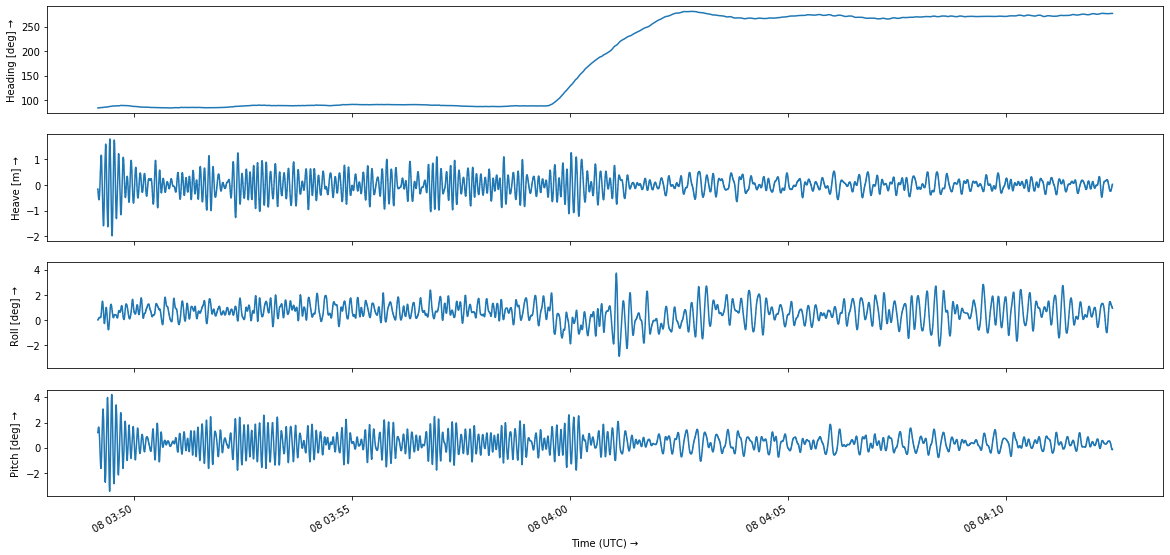

In [34]:
motions = Motion()
motions.read_jhc_file(abs_path+"Lab_A_MRU.txt")
motions.draw()

    Opening motion data file:/home/jupyter-semmed/ESCI_872/Data/Lab_A_MRU.txt
    Drawing Motion Data

### 7.9.0 Defining the plot area

The Matplotlib provides the figure module which allows you to control the properties of plots. In our case we want to show the plot at a defined size. We can accomplish this by setting the figsize attribute of figure, in our case we want to define a drawing area with a width of 20 and height of 10.

To achieve this add the following line at the bottom of the draw method.:

    plt.figure(figsize=(20, 10))
    
Also add the line at the bottom of the draw method:

    #Last thing to do
    plt.show()
 
This line forces a visualization of the plot we have created so-far. Which at this point will show nothing as we have not plotted anything yet


Opening motion data file:/home/jupyter-semmed/ESCI_872/Data/Lab_A_MRU.txt
Drawing Motion Data


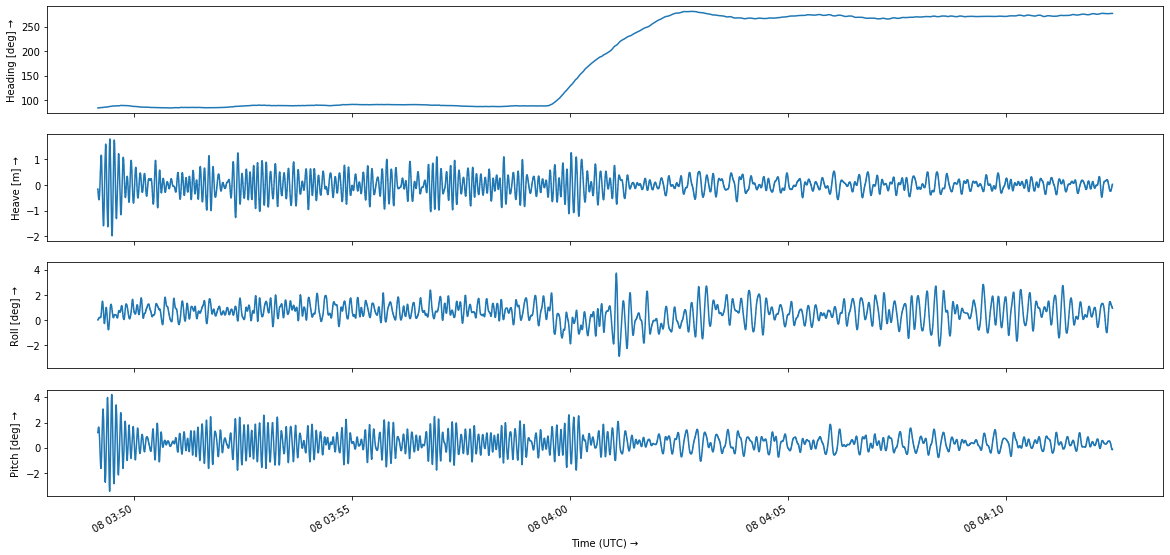

In [35]:
motions = Motion()
motions.read_jhc_file(abs_path+"Lab_A_MRU.txt")
motions.draw()

    Opening motion data file:/home/jupyter-semmed/ESCI_872/Data/Lab_A_MRU.txt
    Drawing Motion Data

    <Figure size 14400x720 with 0 Axes>

### 7.9.1 Creating subplots

In this case we want to plot the data contained in the `Motion` class object `motions`. As you the the `motions` object holds a list of times with for each epoch a yaw, roll, pitch and heave value. It is often useful to plot all four time series together with the same time basis. In this section we will update the draw method to create such a plot. Note that all the plots should share the *same **horizontal** axis scaling*, but that the ***vertical axis** scaling* should be data dependent.

To allows us to create 4 plots in the figure we can use the matplotlib subplot method. In this exercise you will cal the subplot function with three integers describing the position of the subplot. It is perhaps easiest understood by looking at the example in the code cell below:

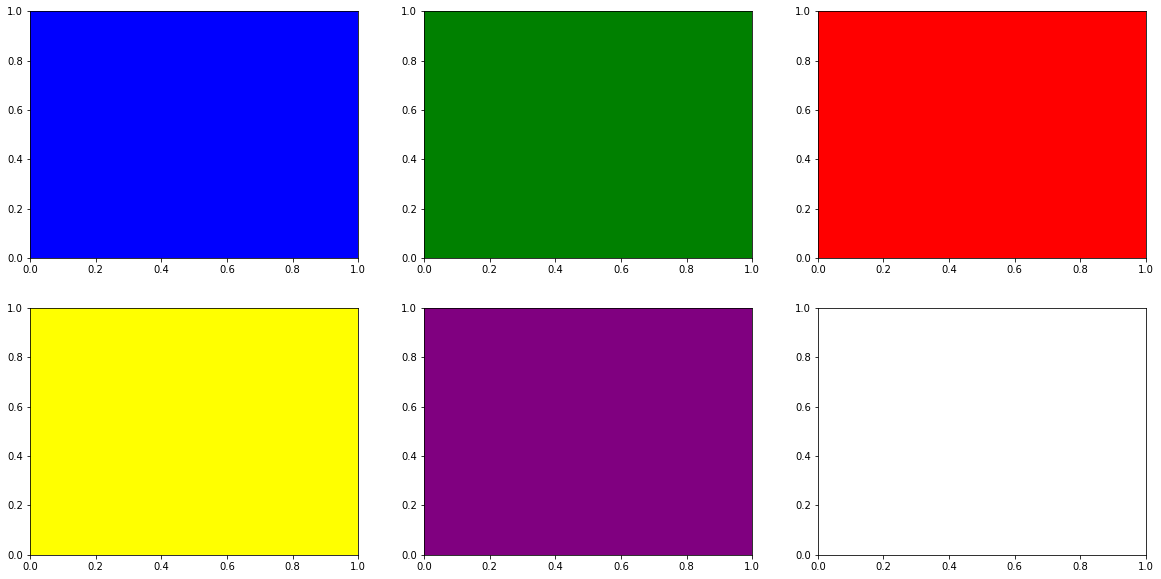

In [36]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
ax1=plt.subplot(2,3,1,facecolor="blue")
ax2=plt.subplot(2,3,2,facecolor="green", sharex=ax1)
ax3=plt.subplot(2,3,3,facecolor="red")
ax4=plt.subplot(2,3,4,facecolor="yellow", sharey=ax3)
ax5=plt.subplot(2,3,5,facecolor="purple")
ax6=plt.subplot(2,3,6)

As you can see there are 2 rows and 3 columns of plots, these are defined by the arguments 2 and 3 in the call to subplot(). The third argument is the index of each plot in the array, index starts at 1 (not zero!) in the top row corner and increases to the right. Once the end of a row is reached the index of the first plot on the next row is the last index of the previous row plus one. In this example the index of the blue plot is 1, the green plot 2, the red plot 3, the yellow plot 4, the purple plot 5, and, finally, the white plot 6.

Confusingly the index of the subplots *starts at 1 rather than 0*, which is **inconsistent** with most Python indexing. This is because `Matplotlib` acts consistently with the `Matlab` plotting functionality. Matlab starts indexing at 1 rather than 0

It is possible to share the x or y limits and scaling of an axis between the plots. In the code example above plot `ax2` shares it's x-axis with the plot ax1 and the plot ax4 shares its y-axis with plot ax3.

Above the plt.show() statement in the draw method add a statement that creates a 4 by 1 array of subplots. Call the subplot at index 1 ax1, the subplot at index 2 ax2, etc. All the plots should be white. All plots should share the x-axis of ax1 and the plot ax4 should share it's y-axis with ax3.

Opening motion data file:/home/jupyter-semmed/ESCI_872/Data/Lab_A_MRU.txt
Drawing Motion Data


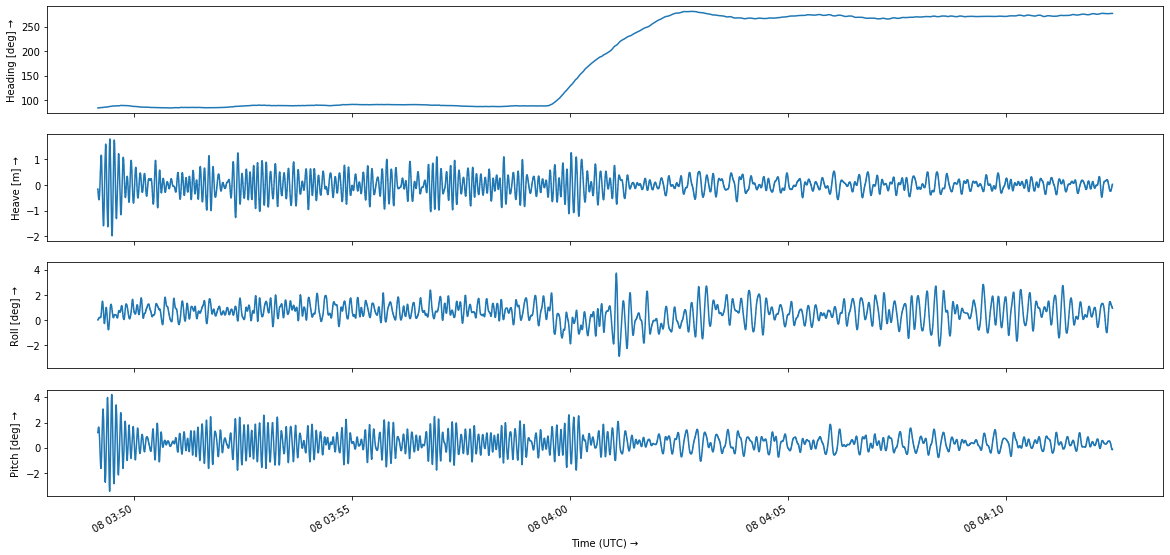

In [37]:
motions = Motion()
motions.read_jhc_file(abs_path+"Lab_A_MRU.txt")
motions.draw()

<img align="left" width="100%" style="padding-right:10px;" src="./Images/empty_plots.png">

#### 7.9.2 Plot the Data

Now that we have defined our plot areas and made sure that the x-axis of all them is shared lets start plotting something useful. Note that the time series all share the same time, so it only makes to use the time as the x-axis. Lets plot the Yaw data in the topmost plot, the heave in the 2<sup>nd</sup> from top, the roll in the 3<sup>d</sup> from top, and finally, the pitch in the 4<sup>th</sup> from top.

To plot the yaw in the top plot use:

    ax1.plot(self.times, np.degrees(self.yaw))

Add this line above the `plt.show()` statement in `the Motion.draw()` method, below this line also add the similar lines that will plot the other data. Note that the `np.degrees()` method converts the units from radians to degrees for you.

Opening motion data file:/home/jupyter-semmed/ESCI_872/Data/Lab_A_MRU.txt
Drawing Motion Data


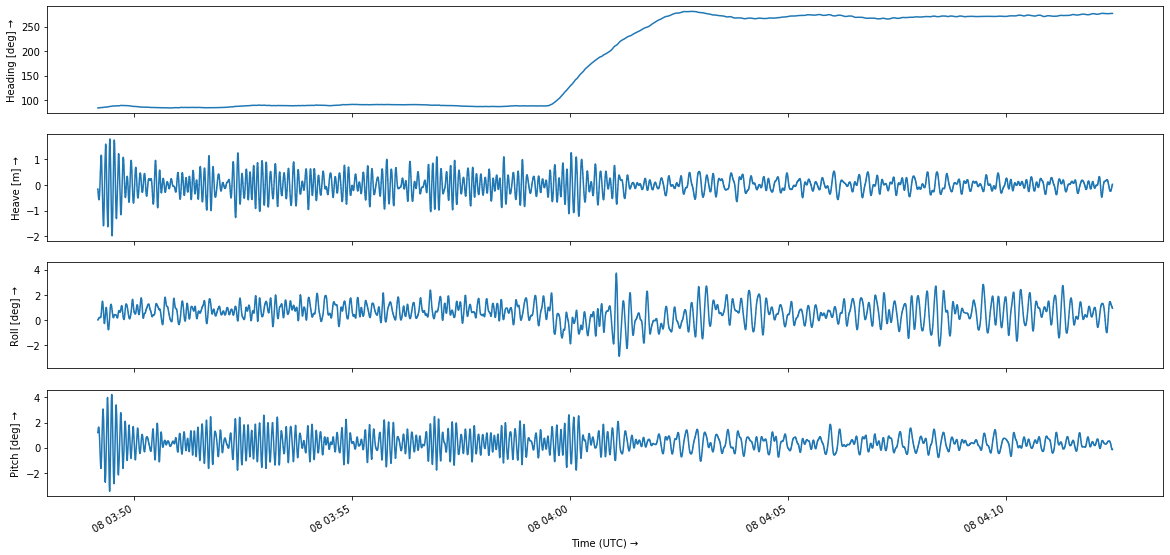

In [38]:
motions = Motion()
motions.read_jhc_file(abs_path+"Lab_A_MRU.txt")
motions.draw()

<img align="left" width="100%" style="padding-right:10px;" src="./Images/data_plots.png">

<img align="left" width="6%" style="padding-right:10px;" src="./Images/test.png">

Hopefully you understand why it makes sense to link the y-axis of the third (roll) and fourth (pitch) plots, but not the other two. Think about this and add your thoughts to the [discussion](https://teams.microsoft.com/l/message/19:475e2d400ca14ba1be1222841b7e1bde@thread.tacv2/1634076551327?tenantId=d6241893-512d-46dc-8d2b-be47e25f5666&groupId=e05e4f0f-c653-4060-854e-6a776126d431&parentMessageId=1634076551327&teamName=ESCI%20872%202021&channelName=Lab7&createdTime=1634076551327) for the plot scaling on Teams. In this context I should point out that in many software applications the developers choose to show the pitch and roll in the same plot, using color coding to identify each time-series. This has two advantages as it shows the relation between the two well, and also it lakes screen space to visualize these data. 

#### 7.9.3 Labeling the Axes

Now that we are plotting some data in appropriately scaled methods we should add some labels to the axes that will allow the users to understand what they are looking at. First we will label the x-axis using

    ax4.set_xlabel('Time ('+self.metadata['time_basis']+') →')

Note that this sets the labels for the bottom most plot, but since that and all other plots share their x-axis the labels are sufficient for all plots. Also note that we made use of the metadata to ensure the proper labeling of the data.

Dates are notoriously difficult to deal with as labels - fortunately matplotlib provides the `autofmt_xdate()` method for the figure that always ensures readability of the date and time labels regardless the size of the image. Add this functionality by adding the line:

    plt.gcf().autofmt_xdate()
    
Now that we have labels that allow us to understand the units along the x-axis lets also add labels for the various y-axes. For example we may label the Heading by using:

    ax1.set_ylabel('Heading [deg] →')
    
Add labels for all the axes in the `Motions.draw()` method 


Opening motion data file:/home/jupyter-semmed/ESCI_872/Data/Lab_A_MRU.txt
Drawing Motion Data


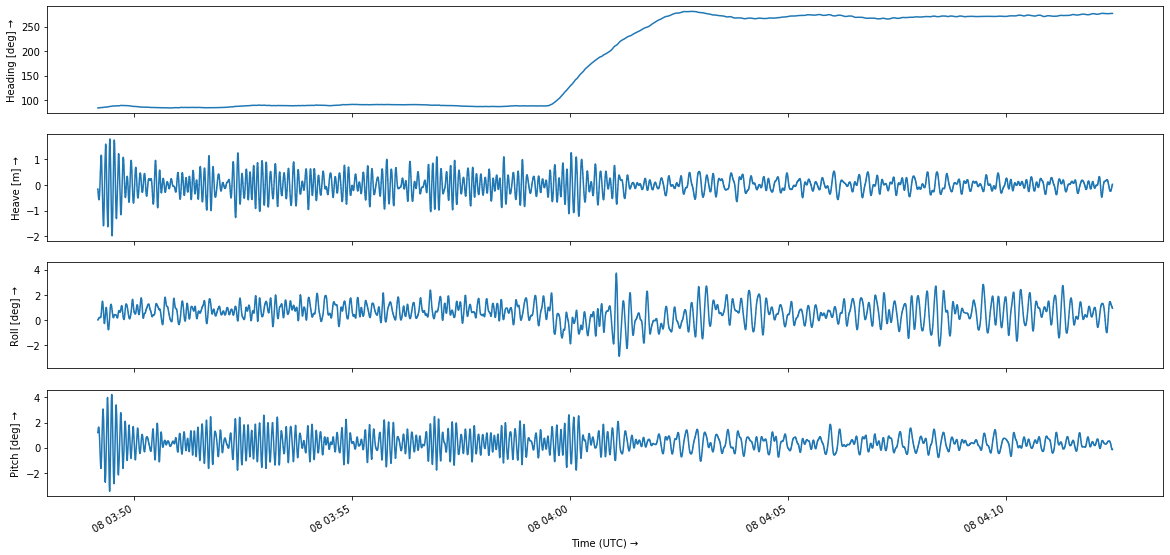

In [39]:
motions = Motion()
motions.read_jhc_file(abs_path+"Lab_A_MRU.txt")
motions.draw()

<img align="left" width="100%" style="padding-right:10px;" src="./Images/labeled_data_plots.png">

***
## 7.10 Getting Motion Data as a Vector for a Specific Epoch

The Motion object `motions` now holds a time-series of motion values and so we could represent the motion in a plot such as the one generated above. Note that in that representation we used straight lines to connect the various observations - a process known as **linear interpolation**. A truer representation of the data is to represent them by dots, the lines represent data at epochs for which there is no data present. In this case the error in the value that is represented is fairly minimal as the samples are spaced fairly closed to each other in time, the further the samples are apart the more we start failing at representing the true signal and the more we start needing some more sophisticated techniques than  just connecting the lines by straight lines. There are all kinds of **filtering** techniques that we may apply, not just to interpolate the data, but also to reduce the effects of systematic and random errors in the signal that we are trying to observe.

We often find ourselves in the situation that we need data for an epoch at which we did not observe a process. In this case we need to interpolate the data much like we implicitly did in the generation of our plots. In our case the data is sampled at a high enough rate that the level of error induced by linear interpolation is acceptable, so we will use linear interpolation to get the right values.

For example we want to know what the orientation of the vessel is for the times at which we have positioning data.
We also have positioning data for the vessel in a `JHC` file format. Add the following method to your `Position` class:

    def read_jhc_file(self, fullpath):

        # Set the reference ellipsoid to WGS84

        self.metadata["ellipsoid_name"] = "WGS84"
        self.metadata["geoid_name"] = "EGM08"
        self.metadata["height_relative_to"] = "geoid"
        
        # Check the File's existence
        if os.path.exists(fullpath):
            self.data_path = fullpath
            print('Opening GNSS data file:' + fullpath)
        else:  # Raise a meaningful error
            raise RuntimeError('Unable to locate the input file' + fullpath)

        # Open, read and close the file
        gnss_file = open(fullpath)
        gnss_content = gnss_file.read()
        gnss_file.close
        
        times=list();

        # Tokenize the contents
        gnss_lines = gnss_content.splitlines()
        count = 0  # initialize the counter for the number of rows read
        for gnss_line in gnss_lines:
            observations = gnss_line.split()  # Tokenize the string
            time = datetime.fromtimestamp(
                float(observations[5]), timezone.utc)
            times.append(time)
            self.latitudes.append(float(observations[8]))
            self.longitudes.append(float(observations[7]))
            self.heights.append(float(observations[6]))
            count += 1

        self.times=np.asarray(times)
        
and at the of the `positions.py` replace the line

    from datetime import datetime, timedelta
    
with:
    
    from datetime import datetime, timedelta, timezone
    
In the code cell below we will use this to read the navigation data

In [50]:
positions = Position()
positions.read_jhc_file(abs_path+'/Lab_A_GNSS.txt')
print(positions.times)

Opening GNSS data file:/home/jupyter-semmed/ESCI_872/Data//Lab_A_GNSS.txt
[datetime.datetime(2011, 5, 8, 3, 49, 11, tzinfo=datetime.timezone.utc)
 datetime.datetime(2011, 5, 8, 3, 49, 12, tzinfo=datetime.timezone.utc)
 datetime.datetime(2011, 5, 8, 3, 49, 13, tzinfo=datetime.timezone.utc)
 ...
 datetime.datetime(2011, 5, 8, 4, 12, 25, tzinfo=datetime.timezone.utc)
 datetime.datetime(2011, 5, 8, 4, 12, 26, tzinfo=datetime.timezone.utc)
 datetime.datetime(2011, 5, 8, 4, 12, 27, tzinfo=datetime.timezone.utc)]


    Opening GNSS data file:/home/jupyter-semmed/ESCI_872/Data//Lab_A_GNSS.txt
    [datetime.datetime(2011, 5, 8, 3, 49, 11, tzinfo=datetime.timezone.utc)
     datetime.datetime(2011, 5, 8, 3, 49, 12, tzinfo=datetime.timezone.utc)
     datetime.datetime(2011, 5, 8, 3, 49, 13, tzinfo=datetime.timezone.utc)
     ...
     datetime.datetime(2011, 5, 8, 4, 12, 25, tzinfo=datetime.timezone.utc)
     datetime.datetime(2011, 5, 8, 4, 12, 26, tzinfo=datetime.timezone.utc)
     datetime.datetime(2011, 5, 8, 4, 12, 27, tzinfo=datetime.timezone.utc)]

___
### 7.10.0 Creating the `Position.get_motion()` Method

We now have an array of times `position.times` at which we obtained positions - we want to know the orientation of the vessel at the positioning epochs, thus we need to create a method that will interpolate these times. Create the method `Position.get_motion()`:

    def get_motion(self, time = datetime.fromtimestamp(0, timezone.utc)):
    
The method as defined above takes the arguments `self`(to get access to the class attributes),  and `time` as a `datetime` objects. 

___
### 7.10.1 Allocating Memory

The first thing that we want to do is to pre-allocate memory in a numpy array - we already know that there are 4 parameters for each observation (roll, pitch, yaw and heave):

    attitude = np.zeros(4)
    
### 7.10.2 Map the Input Times to POSIX Times

Though representing time as `datetime` objects has many advantages for interpolation it is better to represent it as a simple floating point value. The aforementioned **POSIX** format is an example of such a time representation and is very well understood, so we will make use of that here at the bottom of  `Position.get_motion()`  add:
        
    times = np.array([e.timestamp() for e in self.times])

thus times is now a time series of POSIX format times allowing us to linearly interpolate the data.

### 7.10.3 Linearly Interpolate the Motion Data

We can now interpolate by using `numpy`'s interp method, but note the time of interest also needs to be represented in the POSIX format. For example we can get the roll for the epoch represented by `time` by adding the following line to the bottom of `Position.get_motion()`:

    attitude[0] = np.interp(time.timestamp(), times, self.roll)
    
Do the same thin for the pitch (`attitude[1]`), yaw(`attitude[2]`), and heave(`attitude[3]`) and return the `attitude` array.

We may now obtain the attitude for each of the positions:

In [60]:
positions = Position()
positions.read_jhc_file(abs_path+'/Lab_A_GNSS.txt')
motions = Motion()
motions.read_jhc_file(abs_path+"Lab_A_MRU.txt")
print(motions.get_motion(positions.times[100]))

Opening GNSS data file:/home/jupyter-semmed/ESCI_872/Data//Lab_A_GNSS.txt
Opening motion data file:/home/jupyter-semmed/ESCI_872/Data/Lab_A_MRU.txt
[-1.22173048e-03  2.96705973e-03  1.46817097e+00  2.10000000e-01]


    Opening GNSS data file:/home/jupyter-semmed/ESCI_872/Data//Lab_A_GNSS.txt
    Opening motion data file:/home/jupyter-semmed/ESCI_872/Data/Lab_A_MRU.txt
    [-1.22173048e-03  2.96705973e-03  1.46817097e+00  2.10000000e-01]


***
## 7.11 Getting Motion Data as a Rotation Matrix for a Specific Epoch

Though getting the motions as a vector may be useful it is often beneficial to return the attitude as a rotation matrix following a specific orientation order. For example, if we intend to always use right handed intrinsic rotations in the *xyz* rotation order in our software we can reinforce that notion by creating a method that returns rotation matrices that implement this order. We will do this here by adding the  `Motion.get_rotation_matrix()` method.

Add the following method to your `Motion` class:

    def get_rotation_matrix(self, time = datetime.fromtimestamp(0, timezone.utc)):

### 7.11.1 Determining the Attitude

We already know how to get the attitude for the epoch `time`, namely through a call to the method `Motion.get_motion()` that we just created - let us make use of this by adding the following line:

    att = self.get_motion(time)
    
`att` is now the `numpy` array representing our orientation in space.

###  7.11.2 Creating the Axes Rotation Matrices

The first thing that we may do is to create the matrix `Rx` that implements the rotation around the X-axis, which in our right-handed system with the x-axis pointing forward is the roll i.e., `att[0]`. To witness:

        Rx = np.array([[1, 0,            0          ],
                       [0, cos(att[0]), -sin(att[0])],
                       [0, sin(att[0]),  cos(att[0])]])

Similarly the rotation around the y-axis is the pitch i.e., `att[1]`.

        Ry = np.array([[ cos(att[1]),  0, sin(att[1])],
                       [ 0          ,  1, 0          ],
                       [-sin(att[1]),  0, cos(att[1])]])
                       
Finally the rotation around the z-axis is the yaw i.e., `att[2]`.

        Rz = np.array([[cos(att[2]), -sin(att[2]), 0],
                       [sin(att[2]),  cos(att[2]), 0],
                       [0          ,  0          , 1]])
                       
The heave is a translation rather than a rotation so we do not involve it.

###  7.11.3 Creating Rotation Matrix

Finally we return the matrix implementing the `xyz` order - The matrix is simply the product of the three matrices - which in Python is obtained through the `@` operator. For example $A\cdot B$ is implemented in python as `A@B` 

return the matrix $R_{xyz}$ as the product of the matrices $R_{x}$, $R_{y}$, and $R_{z}$. Remember the reverse order of multiplication in linear algebra!

In [64]:
positions = Position()
positions.read_jhc_file(abs_path+'/Lab_A_GNSS.txt')
motions = Motion()
motions.read_jhc_file(abs_path+"Lab_A_MRU.txt")
print(motions.get_rotation_matrix(positions.times[100]))

Opening GNSS data file:/home/jupyter-semmed/ESCI_872/Data//Lab_A_GNSS.txt
Opening motion data file:/home/jupyter-semmed/ESCI_872/Data/Lab_A_MRU.txt
[[ 1.02444863e-01 -9.94738267e-01 -9.11341516e-04]
 [ 9.94734259e-01  1.02441631e-01  3.07660295e-03]
 [-2.96705538e-03 -1.22172479e-03  9.99994852e-01]]


    Opening GNSS data file:/home/jupyter-semmed/ESCI_872/Data//Lab_A_GNSS.txt
    Opening motion data file:/home/jupyter-semmed/ESCI_872/Data/Lab_A_MRU.txt
    [[ 1.02444863e-01 -9.94738267e-01 -9.11341516e-04]
     [ 9.94734259e-01  1.02441631e-01  3.07660295e-03]
     [-2.96705538e-03 -1.22172479e-03  9.99994852e-01]]|

##  7.12 Using the Motion Data

All the above is good and well, but what can we do with this? Imagine that we have a ship with a vector representing the location of the bow relative to its reference point e.g.,[10,0,0], this vector is then known as the `lever_arm` $\overrightarrow{\text{lever arm}}$ and is defined in the ship's reference frame. 

It may be of interest to see how this lever_arm is aligned to the world. For this we can make use of the rotation matrices that we created in step 7.11. We will create the `Motion.geo_reference_la()` method which rotates the vector (or lever arm) from the ships reference frame to the geo_reference_frame using the rotation matrix.

Add the following method to your `Motion` class:

    def geo_reference_la(self, time = datetime.fromtimestamp(0, timezone.utc), la = np.array([[0],[0],[0]])):
    
in this method the argument la is a 2-dimensional (there are rows and a column) array representing a 3-dimensional lever arm (the three 3 rows represent distances along the x, y, and z axes)

### 7.12.0 Getting the Attitude

for this operation we want to use the attitude as represented by a rotation matrix, we already know how to get the attitude for the epoch `time`, namely through a call to the method `Motion.get_rotation_matrix()` that we just created - let us make use of this by adding the following line:

    R = self.get_rotation_matrix(time)
    
`R` is now the `numpy` representing our orientation in space.

### 7.12.1 Obtaining the Lever Arm in Geo-Referenced Space

the coordinates of the lever arm in geo-referenced space are now simply given by the Matrix product $R\cdot\overrightarrow{\text{lever arm}}$ 

return this product


In [85]:
positions = Position()
positions.read_jhc_file(abs_path+'/Lab_A_GNSS.txt')
motions = Motion()
motions.read_jhc_file(abs_path+"Lab_A_MRU.txt")

# Create a lever arm in the ship's reference frame
lever_arm_srf = np.array([[10],[0],[0]])
print('\n\nlever arm in ship\'s reference frame: \n' + str(lever_arm_srf))

# Represents the same lever arm in geo-referenced space
lever_arm_geo = motions.geo_reference_la(positions.times[100],lever_arm_srf)
print('\n\nlever arm in geo-reference frame: \n' + str(lever_arm_geo))

print('The heading in degrees at this point in time: '+str(motions.get_motion(positions.times[100])[2]*180/np.pi))
print('The pitch in degrees at this point in time: '+str(motions.get_motion(positions.times[100])[1]*180/np.pi))

Opening GNSS data file:/home/jupyter-semmed/ESCI_872/Data//Lab_A_GNSS.txt
Opening motion data file:/home/jupyter-semmed/ESCI_872/Data/Lab_A_MRU.txt


lever arm in ship's reference frame: 
[[10]
 [ 0]
 [ 0]]


lever arm in geo-reference frame: 
[[ 1.02444863]
 [ 9.94734259]
 [-0.02967055]]
The heading in degrees at this point in time: 84.12
The pitch in degrees at this point in time: 0.17000000000000004


    Opening GNSS data file:/home/jupyter-semmed/ESCI_872/Data//Lab_A_GNSS.txt
    Opening motion data file:/home/jupyter-semmed/ESCI_872/Data/Lab_A_MRU.txt


    lever arm in ship's reference frame: 
    [[10]
     [ 0]
     [ 0]]


    lever arm in geo-reference frame: 
    [[ 1.02444863]
     [ 9.94734259]
     [-0.02967055]]
    The heading in degrees at this point in time: 84.12
    The pitch in degrees at this point in time: 0.17000000000000004

<img align="left" width="6%" style="padding-right:10px;" src="./Images/test.png">

Note that the heading is given as the angle from North in clockwise direction, as is usual in navigation and that the geo-referenced frame is right handed. At the hand of the output of the code cell above [discuss](https://teams.microsoft.com/l/message/19:475e2d400ca14ba1be1222841b7e1bde@thread.tacv2/1634144374257?tenantId=d6241893-512d-46dc-8d2b-be47e25f5666&groupId=e05e4f0f-c653-4060-854e-6a776126d431&parentMessageId=1634144374257&teamName=ESCI%20872%202021&channelName=Lab7&createdTime=1634144374257) on teams in which direction the x-axis is pointing (North, South, West, or East), the y-axis(North, South, West, or East)and finally the z-axis(up or down) 

<img align="left" width="6%" style="padding-right:10px; padding-top:10px;" src="Images/refs.png">

## Useful References

* [The official Python 3.6 documentation](https://docs.python.org/3.6/index.html)
  * [Classes](https://docs.python.org/3.6/tutorial/classes.html)
  * [String Representation Method](https://docs.python.org/3.6/reference/datamodel.html?highlight=repr#object.__str__)
* [Memory address](https://en.wikipedia.org/wiki/Memory_address)
* [ePOM: Programming Basics with Python](https://github.com/hydroffice/python_basics)
* [ePOM: Foundations of Ocean Data Science](https://github.com/hydroffice/ocean_data_science)
* [Tilt Sensing Using a Three-Axis 
Accelerometer](https://www.nxp.com/files-static/sensors/doc/app_note/AN3461.pdf)


<img align="left" width="5%" style="padding-right:10px;" src="Images/email.png">

*For issues or suggestions related to this notebook that should not be addressed on Teams, write to: semmed@ccom.unh.edu*

Python code and Notebook implementation by Semme J. Dijkstra
Data from OE/ESCI 774/874 Lab A by John Hughes Clarke